
# Principal Component Analysis (PCA)



## Importing Modules


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pytest import param
from sklearn import linear_model
import scipy
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec

import regressions
import data

from sklearn.model_selection import train_test_split as split
from tqdm import tqdm


## Initial Analysis


Eigenvector 1: [ 0.71626515 -0.68292637 -0.14344267]
Eigenvalue 1: 2.46e+02
Correlation with FRC: -0.2139721934946206

Eigenvector 2: [-0.10363057 -0.30737367  0.94592924]
Eigenvalue 2: 2.01e+02
Correlation with FRC: 0.6072968253642961

Eigenvector 3: [0.69009053 0.66267111 0.2909331 ]
Eigenvalue 3: 1.44e+02
Correlation with FRC: 0.3524850608787542


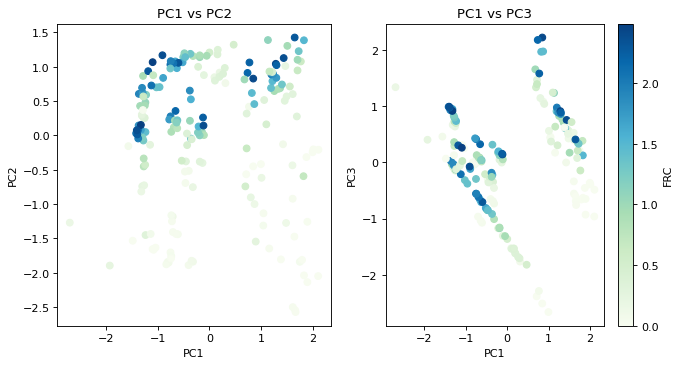

In [2]:
parameters = ['Conductivity', 'pH', 'ORP']
chosen_sets = data.all_files
FRCbot = 0
FRCtop = 2.5

X0, X, evecs, best_PC, X_prime, best_val =  regressions.PCA_bounded_FRC(parameters, chosen_sets,  FRCbot, FRCtop)


## Scoring for Initial Sets

In [6]:
parameters = ['Conductivity', 'pH', 'ORP']
chosen_sets = data.all_files
FRCbot = 0
FRCtop = 2.5

print(parameters)
dimension = len(parameters)
range_var = 'FRC'
df = data.form_dataframe(parameters, chosen_sets, range_var, FRCbot, FRCtop)
X_prime = df.to_numpy()

scores = []
scores2 = []
correlations = []
PC_av = np.zeros(dimension)
for i in tqdm(range(50)):
    x_train, x_test, y_train, y_test = split(X_prime, np.zeros(X_prime.shape[0]), test_size=0.2, random_state=i)
    X0, X, evecs, best_PC, best_val =  regressions.PCA_for_scoring(x_train)
    X02, X2, evecs2, best_PC2, best_vals =  regressions.PCA_for_scoring(x_test)
    score, PC = regressions.calc_score_three_groups(X2, evecs, best_PC, x_test)
    score2, PC = regressions.calc_score_two_groups(X2, evecs, best_PC, x_test)
    PC_av += np.absolute(PC)
    scores.append(score)
    scores2.append(score2)
    correlations.append(best_val)

print('mean PC: {}'.format(PC_av/50))
print('mean score: {}'.format(np.mean(scores)))
print ('mean two class score: {}'.format(np.mean(scores2)))
print('mean correlation: {}'.format(np.mean(correlations)))

X0, X, evecs, best_PC, best_val =  regressions.PCA_for_scoring(X_prime)
print('PC{}: {}'.format(best_PC, best_val))

['Conductivity', 'pH', 'ORP']


100%|██████████| 50/50 [00:00<00:00, 366.85it/s]

mean PC: [0.12823141 0.30235182 0.92882749]
mean score: 0.47
mean two class score: 0.7774999999999999
mean correlation: 0.5956204606855282
PC2: 0.6072968253642961
